6. Model Evaluation and HyperParameter Tuning
# Streamlining workflows with pipeline (from scikit)
An extremely handy tool that allows us to fit a model including an arbitrary number of
transformation steps and apply it to make predictions about new data. This way, instead of going through the fitting and transformation steps for the training and test dataset separately, we can chain the StandardScaler, PCA, and LogisticRegression objects in a pipeline

# Loading the Breast Cancer Wisconsin dataset (from UCI)
1. load data[df] which has 32 features
2. compute X from df containing features from 2nd till 32nd one 
3. Transform y from 'M' or 'B' to 0 or 1 (M-> malign, B-> Beningn)

In [12]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# compute X & y
X = df.loc[:, 2:].values
y = df.loc[:, 1].values

# transform y from ['M','B'] a.k.a malign & Benign to [0,1]
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Combining transformers and estimators in a pipeline
Instead of going through the fitting and transformation steps for the training and test dataset separately, we can chain the StandardScaler, PCA, and LogisticRegression objects in a pipeline

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

p = Pipeline([('scl', StandardScaler()),
              ('pca', PCA(n_components=2)), 
              ('lr', LogisticRegression(random_state=1))])

p.fit(X_train, y_train)
#print "Train accuracy: %.3f" %(p.score(X_train, y_train))
#print "Test accuracy: %.3f" %(p.score(X_test, y_test))

Train accuracy: 0.954
Test accuracy: 0.947


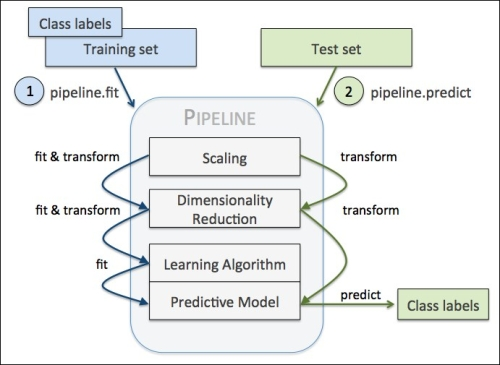

In [4]:
from IPython.display import Image
Image("/Users/surthi/gitrepos/ml-notes/images/ModelEvaluation.jpg")

In [28]:
print "Done loading data and pipeline"

Done loading data and pipeline
